In [1]:
import numpy as np
import skimage.io
import cv2
import cv
import math
%matplotlib inline

/opt/conda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


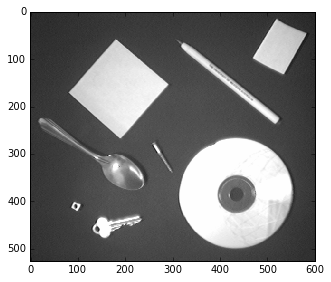

In [5]:
img = skimage.io.imread('./line1.png')
skimage.io.imshow(img)

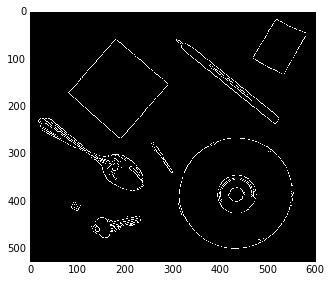

In [6]:
edges = cv2.Canny(img, 50, 150)
skimage.io.imshow(edges)

In [270]:
def houghlines(img, rho, theta, threshold, acc=1):
    height = int(np.pi / theta)
    width = img.shape[0] + img.shape[1]
    haf = np.zeros((height, width)).astype(int)
    
    fs = []
    for i in range(height):
        f = np.pi * i / height
        fs.append((math.sin(f), math.cos(f)))
    
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x][y]:
                for i in range(height):
                    a = fs[i][0] * x + fs[i][1] * y
                    fr = min(max(int(a - acc) + width // 2, 0), width)
                    to = min(max(int(a + acc) + 1 + width // 2, 0), width)
                    for j in range(fr, to, rho):
                        haf[i][j] += 1
    
    lines = []
    for i in range(height):
        for j in range(width):
            if (haf[i][j] > threshold):
                lines.append((j - width // 2, np.pi * i / height))
    
    return lines
            

In [296]:
def ptint(x, y):
    return (int(x), int(y))

def draw_lines(lines, img):
    new_img = np.copy(img)
    
    for rho, theta in lines:
        c, s = math.cos(theta), math.sin(theta)
        x0, y0 = rho * c, rho * s
        
        pt1 = ptint(x0 + 1000 * s, y0 - 1000 * c)
        pt2 = ptint(x0 - 1000 * s, y0 + 1000 * c)
        
        cv2.line(new_img, pt1, pt2, (150, 0, 0), 2)
    
    return new_img

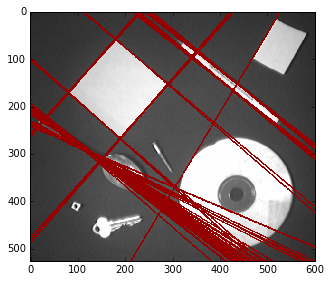

In [23]:
lines = houghlines(edges, 1, np.pi/180, 200)
edges_lines = draw_lines(lines, cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
skimage.io.imshow(edges_lines)

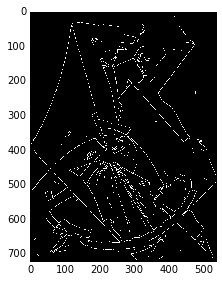

In [272]:
img = skimage.io.imread('line2.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(img, 350, 450)
skimage.io.imshow(edges)

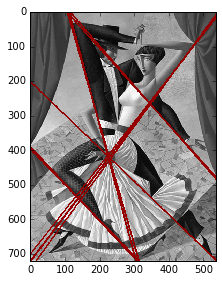

In [276]:
lines = houghlines(edges, 1, np.pi/180, 270)
edges_lines = draw_lines(lines, cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
skimage.io.imshow(edges_lines)

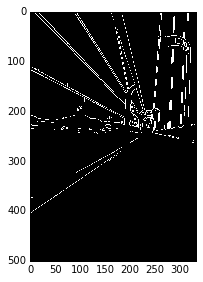

In [289]:
img = skimage.io.imread('line3.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(img, 350, 450)
skimage.io.imshow(edges)

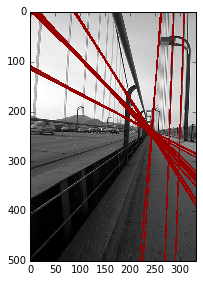

In [294]:
lines = houghlines(edges, 1, np.pi/180, 300)
edges_lines = draw_lines(lines, cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
skimage.io.imshow(edges_lines)

<h1 style="text-align:center">Opencv libs</h1>

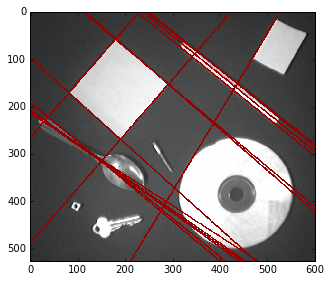

In [36]:
img = skimage.io.imread('line1.png')
edges = cv2.Canny(img, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi/180, 100)
edges_lines = draw_lines(lines[0], cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
skimage.io.imshow(edges_lines)

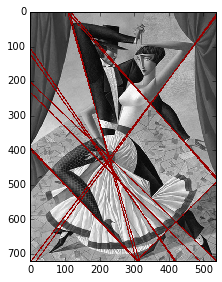

In [301]:
img = skimage.io.imread('line2.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(img, 350, 450)
lines = cv2.HoughLines(edges, 1, np.pi/180, 120)
edges_lines = draw_lines(lines[0], cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
skimage.io.imshow(edges_lines)

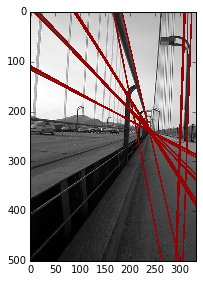

In [304]:
img = skimage.io.imread('line3.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(img, 350, 450)
lines = cv2.HoughLines(edges, 1, np.pi/180, 130)
edges_lines = draw_lines(lines[0], cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
skimage.io.imshow(edges_lines)

<h1>Circles</h1>

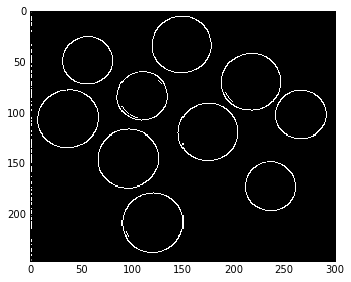

In [160]:
img = skimage.io.imread('circle1.png')
edges = cv2.Canny(img, 350, 550)
skimage.io.imshow(edges)

In [171]:
def houghcircles(img, pres, threshold, maxRadius = 0):
    height, width = img.shape
    max_r = height + width
    if maxRadius:
        max_r = maxRadius + 1
    
    haff = np.zeros((height / pres + 1, width / pres + 1, max_r))
    cnt = 0
    
    rs = [[int((x ** 2 + y ** 2) ** 0.5 + 0.5) for y in range(width)] for x in range(height)]
    
    for x in range(height):
        for y in range(width):
            if img[x][y]:
                frx, tox, fry, toy = 0, height, 0, width
                if maxRadius:
                    frx, tox = max(x - maxRadius, frx), min(x + maxRadius, tox)
                    fry, toy = max(y - maxRadius, fry), min(y + maxRadius, toy)
                    
                for i in range(frx, tox, pres):
                    for j in range(fry, toy, pres):
                        r = rs[abs(i - x)][abs(j - y)]
                        if not maxRadius or r <= maxRadius:
                            haff[i / pres][j / pres][r] += 1.0
                            
    print(np.max(haff))
    lines = []
    
    for i in range(height / pres):
        for j in range(width / pres):
            for r in range(max_r):
                if haff[i][j][r] > threshold:
                    lines.append((j * pres, i * pres, r))
    return (lines, haff)

In [172]:
def draw_circles(circles, img):
    new_img = np.copy(img)
    
    for i in circles:
        cv2.circle(new_img, (i[0], i[1]), i[2], (255, 0, 0, 255), 2)
    return new_img

In [173]:
np.sum(edges > 0)

2247

109.0
CPU times: user 3.15 s, sys: 44 ms, total: 3.19 s
Wall time: 3.14 s


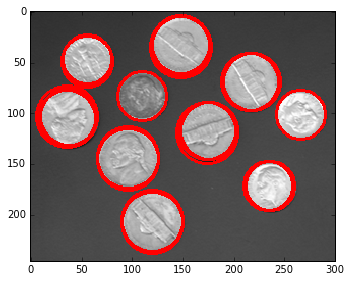

In [175]:
%%time
circles, haff = houghcircles(edges, 2, 60, maxRadius=40)

skimage.io.imshow(draw_circles(circles, img))

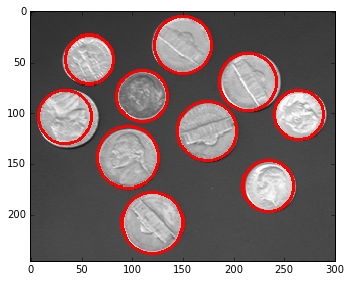

In [319]:
circles = cv2.HoughCircles(edges,cv.CV_HOUGH_GRADIENT,1,20,param2=30)
circles = np.uint16(np.around(circles))

skimage.io.imshow(draw_circles(circles[0,:], img))

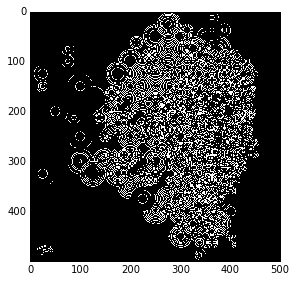

In [177]:
img = skimage.io.imread('circle2.png')
edges = cv2.Canny(img, 100, 150)
skimage.io.imshow(edges)

202.0
CPU times: user 7.6 s, sys: 24 ms, total: 7.63 s
Wall time: 7.61 s


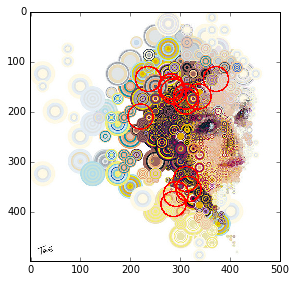

In [179]:
%%time
circles, haff = houghcircles(edges, 5, 195, maxRadius=40)

skimage.io.imshow(draw_circles(circles, img))

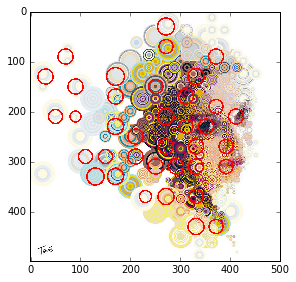

In [124]:
circles = cv2.HoughCircles(edges,cv.CV_HOUGH_GRADIENT,20,40,param1=50,param2=20,maxRadius=40)
circles = np.uint16(np.around(circles))

skimage.io.imshow(draw_circles(circles[0,:], img))

17363

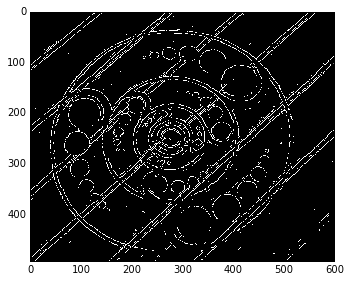

In [184]:
img = skimage.io.imread('circle3.png')
edges = cv2.Canny(img, 350, 450)
skimage.io.imshow(edges)
np.sum(edges > 0)

281.0
CPU times: user 54.5 s, sys: 204 ms, total: 54.7 s
Wall time: 54.6 s


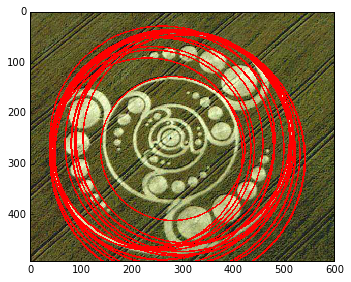

In [204]:
%%time
circles, haff = houghcircles(edges, 10, 200)

skimage.io.imshow(draw_circles(circles, img))

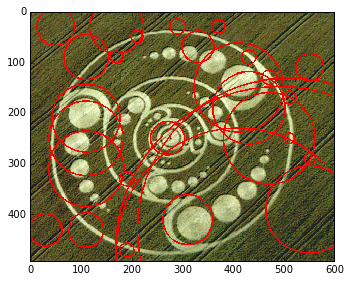

In [203]:
circles = cv2.HoughCircles(edges,cv.CV_HOUGH_GRADIENT,20, 40,param1=30,param2=50)
circles = np.uint16(np.around(circles))

skimage.io.imshow(draw_circles(circles[0,:], img))